## **Import the TensorFlow library**

This code contains a small script that is used for generating a folder full of images. The idea is to show these images to the OpenMV camera (from the laptop monitor) when the training with the OL methos is required. Since the idea is to apply a supervised training is required to have a label/ground truth of the images that the camera is capturing. This script fills a directory with images of digits and creates a txt file in which all the labels are saved. 

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt 
import numpy as np
import random
import os
import csv 

Load MNIST dataset and split in training and test

In [2]:
(data_train, label_train),(data_test, label_test) = mnist.load_data() # Load data
print('The original dataset shapes are')
print(f'    Train dataset shape: {data_train.shape}')
print(f'    Test dataset shape:  {data_test.shape}')

The original dataset shapes are
    Train dataset shape: (60000, 28, 28)
    Test dataset shape:  (10000, 28, 28)


Split the train and test dataset in smaller datasets. Separation criterion is -> "The number is smaller than 6" or "The number os equal or more than 6".

In [3]:
train_samples = label_train.shape[0]
test_samples  = label_test.shape[0]

trainLow_samples = np.sum(np.where(label_train < 6, 1, 0))  # compute how many samples are below 6 -> train dataset
testLow_samples  = np.sum(np.where(label_test <  6, 1, 0))  # compute how many samples are below 6 -> test dataset

# separate in containers data that is lower nad higer than 6
data_low_train   = np.zeros([trainLow_samples,28,28])
label_low_train  = np.zeros(trainLow_samples)
data_high_train  = np.zeros([train_samples-trainLow_samples,28,28])
label_high_train = np.zeros(train_samples-trainLow_samples)

data_low_test   = np.zeros([testLow_samples,28,28])
label_low_test  = np.zeros(testLow_samples)
data_high_test  = np.zeros([test_samples-testLow_samples,28,28])
label_high_test = np.zeros(test_samples-testLow_samples)

j,k = 0,0
for i in range(0,train_samples):  
    if(label_train[i]<6):
        data_low_train[j,:,:] = data_train[i,:,:]
        label_low_train[j]    = label_train[i]
        j+=1
    else:
        data_high_train[k,:,:] = data_train[i,:,:]
        label_high_train[k]    = label_train[i]
        k+=1

j,k = 0,0
for i in range(0,test_samples):  
    if(label_test[i]<6):
        data_low_test[j,:,:] = data_test[i,:,:]
        label_low_test[j]    = label_test[i]
        j+=1
    else:
        data_high_test[k,:,:] = data_test[i,:,:]
        label_high_test[k]    = label_test[i]
        k+=1

print('After the separation of the dataset in groups higer and lower/equal than 6 the datasets are:')
print(f'     Train dataset lower than 6 has shape:        {data_low_train.shape}')
print(f'     Train dataset higher/equal than 6 has shape: {data_high_train.shape}')
print()
print(f'     Test dataset lower than 6 has shape:        {data_low_test.shape}')
print(f'     Test dataset higher/equal than 6 has shape: {data_high_test.shape}')

After the separation of the dataset in groups higer and lower/equal than 6 the datasets are:
     Train dataset lower than 6 has shape:        (36017, 28, 28)
     Train dataset higher/equal than 6 has shape: (23983, 28, 28)

     Test dataset lower than 6 has shape:        (6031, 28, 28)
     Test dataset higher/equal than 6 has shape: (3969, 28, 28)


## **Pre process the data**

In [4]:
# Image dimensions
img_rows, img_cols = 28, 28

In [5]:
# Something I don't know (probably just change the shape of the data)
if K.image_data_format() == 'channels_first':
    data_low_train = data_low_train.reshape(data_low_train.shape[0], 1, img_rows, img_cols)
    data_high_train = data_high_train.reshape(data_high_train.shape[0], 1, img_rows, img_cols)
    data_low_test = data_low_test.reshape(data_low_test.shape[0], 1, img_rows, img_cols)
    data_high_test = data_high_test.reshape(data_high_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    data_low_train = data_low_train.reshape(data_low_train.shape[0], img_rows, img_cols, 1)
    data_high_train = data_high_train.reshape(data_high_train.shape[0], img_rows, img_cols, 1)
    data_low_test = data_low_test.reshape(data_low_test.shape[0], img_rows, img_cols, 1)
    data_high_test = data_high_test.reshape(data_high_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

Normalize the dataset

In [6]:
data_low_train  = data_low_train.astype(np.float32)  / 255.0 
data_high_train = data_high_train.astype(np.float32) / 255.0 
data_low_test   = data_low_test.astype(np.float32)   / 255.0 
data_high_test  = data_high_test.astype(np.float32)  / 255.0 

## **Fill the directory with digits images**

In [7]:
ROOT_PATH   = os.path.abspath('')
IMAGES_PATH = ROOT_PATH + "\\Training_images\\"

6.0


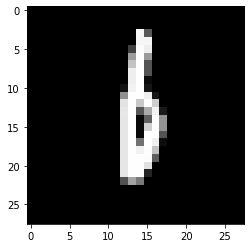

In [8]:
# Test -> save random number in the directory
num = int(random.uniform(0,train_samples-trainLow_samples))
plt.imshow(data_high_train[num], cmap="gray") 
print(label_high_train[num])
plt.savefig(IMAGES_PATH + 'immagine.png')
plt.savefig(IMAGES_PATH + 'immagine.jpg')
plt.show() # Plot the image

In [9]:
n_samples_to_save = 1000

In [10]:
# fill a container with random digits from high dataset and low dataset
# out of the 200 total digits, 120 are from the low dataset, 80 from the high dataset (20 for each digit)

tmp_data_trainOL  = np.zeros((n_samples_to_save,28,28,1))
tmp_label_trainOL = np.zeros(n_samples_to_save)

for i in range(0, n_samples_to_save):
    
    n = int(random.uniform(0,testLow_samples))

    if(i<600):
        tmp_data_trainOL[i,:,:]  = data_low_train[n,:,:]
        tmp_label_trainOL[i]     = label_low_train[n]
    else:
        tmp_data_trainOL[i,:,:]  = data_high_train[n,:,:]
        tmp_label_trainOL[i]     = label_high_train[n]
        
        
# Shuffle the array
random.seed(8524)
order_list = list(range(0,len(tmp_label_trainOL)))    # create list of ordered numbers
random.shuffle(order_list)                            # shuffle the list of ordered numbers

data_trainOL  = np.zeros(tmp_data_trainOL.shape)
label_trainOL = np.empty(tmp_data_trainOL.shape[0], dtype=str) 

for i in range(0, data_trainOL.shape[0]):
    data_trainOL[i,:,:] = tmp_data_trainOL[order_list[i],:,:]    
    label_trainOL[i]    = tmp_label_trainOL[order_list[i]]

Save the images and the label array in the desired directory

In [11]:
label_array = []

for i in range(0, n_samples_to_save):
    if(i<10):
        name = '00' + str(i)
    elif(i<100):
        name = '0' + str(i)
    else:
        name = str(i)
        
    temp_matrix = np.zeros((58,58,1))
    temp_matrix[15:-15,15:-15,:] = data_trainOL[i]
    
    plt.imshow(temp_matrix, cmap="gray") 
    plt.savefig(IMAGES_PATH + name + '.png', dpi=120)
    label_array.append(label_trainOL[i])
    
    print(f"\r  Currently at {np.round(np.round(i/n_samples_to_save,4)*100,2)}% of saving", end="")
    
    
with open(IMAGES_PATH+ 'label_order.txt', 'w') as f:
    
    for i in range(0, len(label_array)):
        f.write(str(label_array[i]))
        if(i!=len(label_array)-1):
            f.write(',')

# ---------------------------------------------

# DEBUG REGION

In [41]:
def createDataset(n_samples_to_save, numbers_requested):

    (data_train, label_train),(data_test, label_test) = mnist.load_data() # Load MNIST dataset
    
    FLAG_ARY = np.zeros(len(numbers_requested))
    
    tot_samples = n_samples_to_save*len(numbers_requested)

    list_of_lists_data   = []
    list_of_lists_labels = []
    
    for i in range(0, len(numbers_requested)):
        list_of_lists_data.append([])
        list_of_lists_labels.append([])
        
    itr = 0
    while(sum(FLAG_ARY) != len(FLAG_ARY)):
        
        for i in range(0, len(numbers_requested)):
            if(label_train[itr] == numbers_requested[i]):
                list_of_lists_data[i].append(data_train[itr])
                list_of_lists_labels[i].append(label_train[itr])
                
            if(len(list_of_lists_labels[i]) == n_samples_to_save):
                FLAG_ARY[i] = 1
        
        itr += 1
                                        
    # transform list of list in multi dimension matrix
    data_matrix = np.zeros((tot_samples,28,28,1))
    label_matrix = np.zeros(tot_samples)
    for i in range(0, data_matrix.shape[0]):
                                        
        data_matrix[i,:,:,0] = list_of_lists_data[i//n_samples_to_save][i%n_samples_to_save]
        label_matrix[i] = list_of_lists_labels[i//n_samples_to_save][i%n_samples_to_save]
                                        
    # Normalize the dataset
    data_matrix  = data_matrix.astype(np.float32)  / 255.0 
            
            
    # Shuffle the array
    random.seed(8524)
    order_list = list(range(0,tot_samples))    # create list of ordered numbers
    random.shuffle(order_list)                            # shuffle the list of ordered numbers

    data_matrix_2  = np.zeros((tot_samples,58,58,1))
    label_matrix_2 = np.empty(tot_samples, dtype=str) 

    for i in range(0, tot_samples):

        temp_matrix = np.zeros((58,58,1))
        temp_matrix[15:-15,15:-15,:] = data_matrix[order_list[i]]

        data_matrix_2[i,:,:,:]  = temp_matrix[:,:,:]
        label_matrix_2[i] = label_matrix[order_list[i]]


    return data_matrix_2, label_matrix_2

In [49]:
numbers_i_want = [0,1,2,3,4,5]
size_i_want = 100
gigio, gigione = createDataset(size_i_want, numbers_i_want)

0


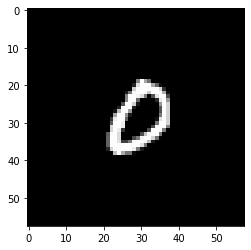

In [64]:
numero = int(random.uniform(0,size_i_want*len(numbers_i_want)))

print(gigione[numero])
plt.imshow(gigio[numero], cmap="gray") 
plt.show()